## Project Milestone 2

This project is a part of the analysis of the movies data set

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from helpers import *

KEYWORDS = [ "Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence" ]
FILE_ID = '1UKCPLE0QpJGDncD6zvXfSIil0pRlCj-c'
LOCAL_FILE_NAME='local_title_data.tsv'

In [29]:
download_data(FILE_ID,LOCAL_FILE_NAME)

file already exists


## 1. Data Pre-processing

### 1.1 Import Data

In [30]:
plot_path= 'data/plot_summaries.txt'
movie_metadata_path = 'data/movie.metadata.tsv'
external_title_path= LOCAL_FILE_NAME
external_rating_path= 'data/data.tsv'

In [31]:
m_plot = pd.read_csv(plot_path, delimiter='\t', header= None)
m_column_names = ['W_movie ID', 'F_movie ID', 'Movie name', 'Release date', 'Box office revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
m_data = pd.read_csv('data/movie.metadata.tsv', delimiter= '\t',on_bad_lines='skip', names=m_column_names, header=0)
rating_data=pd.read_csv(external_rating_path,delimiter='\t', on_bad_lines='skip', header=0)
external_title= pd.read_csv(external_title_path,delimiter='\t', on_bad_lines='skip', header=0)

/var/folders/67/6c4p9l3d6gz7mdpq5tr7rk7w0000gn/T/ipykernel_1171/2205135396.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  external_title= pd.read_csv(external_title_path,delimiter='\t', on_bad_lines='skip', header=0)


### 1.2 Filter Terrorism-Related Movies and Other Movies

In [32]:
movie_ids=[]
# Create a new column in the DataFrame to store the count of keywords in each movie plot
for index, row in m_plot.iterrows():
    movie_id = row[0]
    plot = row[1]
    # Check if the plot contains any of the keywords
    for keyword in KEYWORDS:
        if keyword.lower() in plot:
            movie_ids.append(movie_id)
# Display the list of movie IDs that match the keywords
movie_ids= set(movie_ids)

In [58]:
terrorism_movies = m_data[m_data['W_movie ID'].isin(movie_ids)][['W_movie ID','Movie name', 'Release date','Countries', 'Languages', 'Genres','Box office revenue']]
revenue_data= m_data.dropna(subset=['Box office revenue'])
other_movies= revenue_data[~revenue_data['W_movie ID'].isin(movie_ids)][['W_movie ID','Movie name', 'Release date','Countries', 'Languages', 'Genres','Box office revenue']]

In [59]:
df_plot = m_plot.rename(columns={0: 'W_movie ID', 1: 'summary'})
df_for_topics = pd.merge(terrorism_movies, df_plot, on='W_movie ID', how='inner')
df_for_topics.drop('Box office revenue', axis =1, inplace=True)
df_for_topics.head(3)

,W_movie ID,Movie name,Release date,Countries,Languages,Genres,summary
0,9633533,Vandanam,1989,"{""/m/03rk0"": ""India""}","{""/m/0999q"": ""Malayalam Language""}","{""/m/02kdv5l"": ""Action""}","Professor Kurian Fernandez , a convict escapes..."
1,261237,The Gods Must Be Crazy,1980,"{""/m/0hzlz"": ""South Africa""}","{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",The film is a collision of three separate stor...
2,4951456,Kinjite: Forbidden Subjects,1989,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A...",A Japanese businessman sees a woman being grop...


### 1.3 Remove Nan Values

In [64]:
terrorism_movies = terrorism_movies.sort_values(by=['Release date'])
terrorism_movies['Release date']=  terrorism_movies['Release date'].str[:4]
terrorism_movies.dropna(subset=['Release date'], inplace=True)

## 2.Data wrangling

In [61]:
other_movies = other_movies.sort_values(by=['Release date'])
other_movies['Release date']=  other_movies['Release date'].str[:4]
other_movies.dropna(subset=['Release date'], inplace=True)

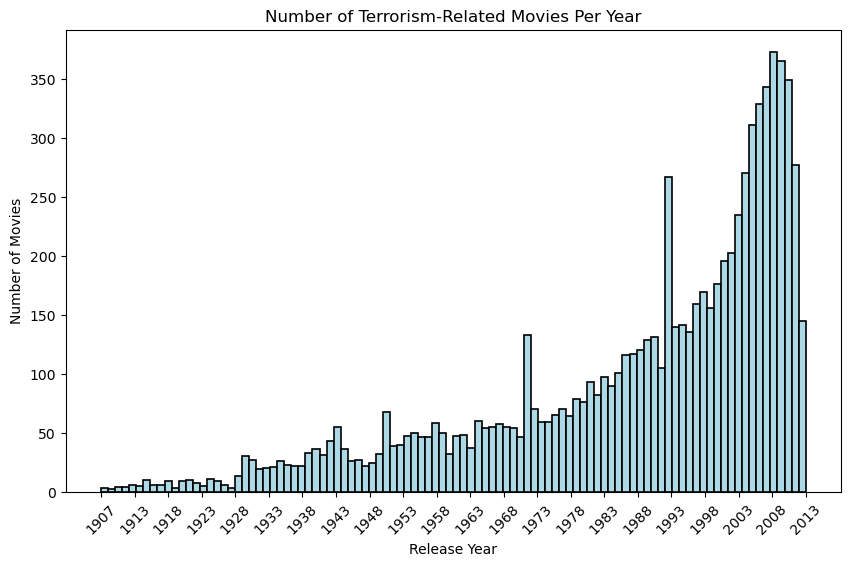

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(terrorism_movies['Release date'],bins= 100, linewidth=1.2, edgecolor='black', color='lightblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
min_year = int(terrorism_movies['Release date'].min())
max_year = int(terrorism_movies['Release date'].max())
plt.title('Number of Terrorism-Related Movies Per Year')
ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45)
plt.show()


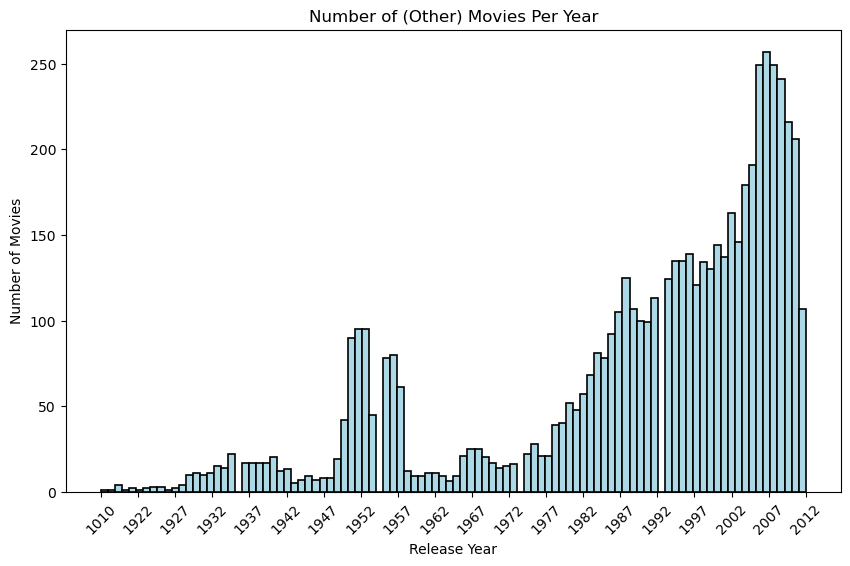

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(other_movies['Release date'],bins= 100, linewidth=1.2, edgecolor='black', color='lightblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
min_year = int(terrorism_movies['Release date'].min())
max_year = int(terrorism_movies['Release date'].max())
plt.title('Number of (Other) Movies Per Year')
ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45)
plt.show()


### 2.1 How popular are terrorism-related movies in comparison to others?

#### 2.1.1 Statistics of Box Office Collections & Visualizations**

<function matplotlib.pyplot.show(close=None, block=None)>

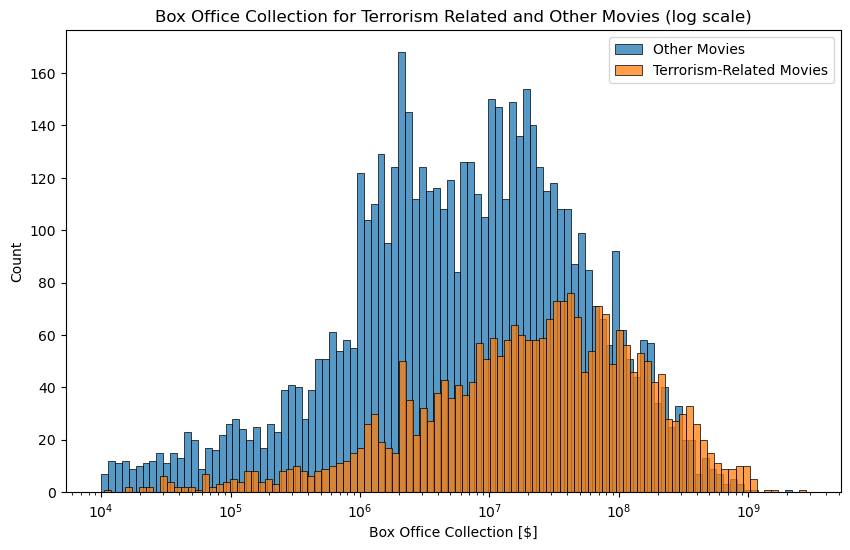

In [37]:
other_movies = other_movies.dropna(subset=['Box office revenue'])

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(other_movies['Box office revenue'], bins=100, log_scale=True, label='Other Movies')
sns.histplot(terrorism_movies['Box office revenue'], bins=100, log_scale=True, label= 'Terrorism-Related Movies')
plt.title('Box Office Collection for Terrorism Related and Other Movies (log scale)')
plt.xlabel('Box Office Collection [$]')
plt.legend()
plt.show


We observed that the box office revenue distribution exhibits a heavy tail. Consequently, rather than focusing on the mean, 23 consider the log-transformed values of the box office collection.

In [38]:
terro_log_revenue= np.log1p(terrorism_movies['Box office revenue'])
others_log_revenue= np.log1p(other_movies['Box office revenue'])

terror_log_revenue_mean= terro_log_revenue.mean()
others_log_revenue_mean= others_log_revenue.mean()

print(terror_log_revenue_mean)
print(others_log_revenue_mean)

16.824938751643955
15.624203760130868


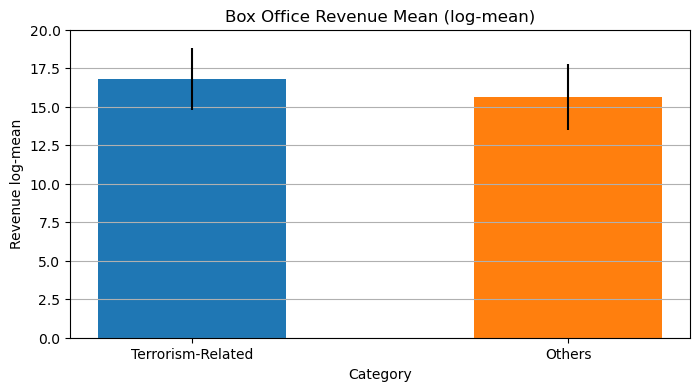

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
categories= ['Terrorism-Related','Others']
log_means= [terror_log_revenue_mean,others_log_revenue_mean]
uncertainties = [np.std(terro_log_revenue, ddof=1), np.std(others_log_revenue, ddof=1)]


for i in range(2):
    plt.bar(categories[i], log_means[i], yerr=uncertainties[i], width=0.5)
#plt.bar(, terror_log_revenue_mean)
#plt.bar(, others_log_revenue_mean)
plt.title('Box Office Revenue Mean (log-mean)')
plt.ylabel('Revenue log-mean')
ax.yaxis.grid(True)
plt.xlabel('Category')
plt.ylim([0,20])
plt.show()

In [40]:
print("Statistics of 'Other Movies' box office collections:")
other_movies['Box office revenue'].describe()

Statistics of 'Other Movies' box office collections:


count    5.808000e+03
mean     3.330517e+07
std      8.092528e+07
min      1.000000e+04
25%      1.600000e+06
50%      7.030036e+06
75%      2.755939e+07
max      2.185372e+09
Name: Box office revenue, dtype: float64

In [41]:
print("Statistics of 'Terrorism-related Movies' box office collections:")
terrorism_movies['Box office revenue'].describe()

Statistics of 'Terrorism-related Movies' box office collections:


count    2.519000e+03
mean     8.276545e+07
std      1.581620e+08
min      1.051400e+04
25%      6.106830e+06
50%      2.618663e+07
75%      8.553192e+07
max      2.782275e+09
Name: Box office revenue, dtype: float64

#### 2.1.2 Rating

In [42]:
other_movies= m_data[~m_data['W_movie ID'].isin(movie_ids)][['W_movie ID','Movie name', 'Release date','Box office revenue']]
terrorsim_movies= m_data[m_data['W_movie ID'].isin(movie_ids)][['W_movie ID','Movie name', 'Release date','Box office revenue']]

In [43]:
#extract only movie related information
external_title = external_title[external_title['titleType'] == 'movie']
#merge the rating_data with external_title data on 'tconst'
merge_title_rating= pd.merge(rating_data,external_title,left_on='tconst', right_on='tconst', how='inner')

In [44]:
other_merged= pd.merge(other_movies,merge_title_rating, left_on='Movie name', right_on='originalTitle', how='inner')
other_merged= other_merged.drop_duplicates(subset=['Movie name'])

In [45]:
terrorism_merged= pd.merge(terrorism_movies,merge_title_rating, left_on='Movie name', right_on='originalTitle', how='inner')
terrorism_merged= terrorism_merged.drop_duplicates(subset=['Movie name'])

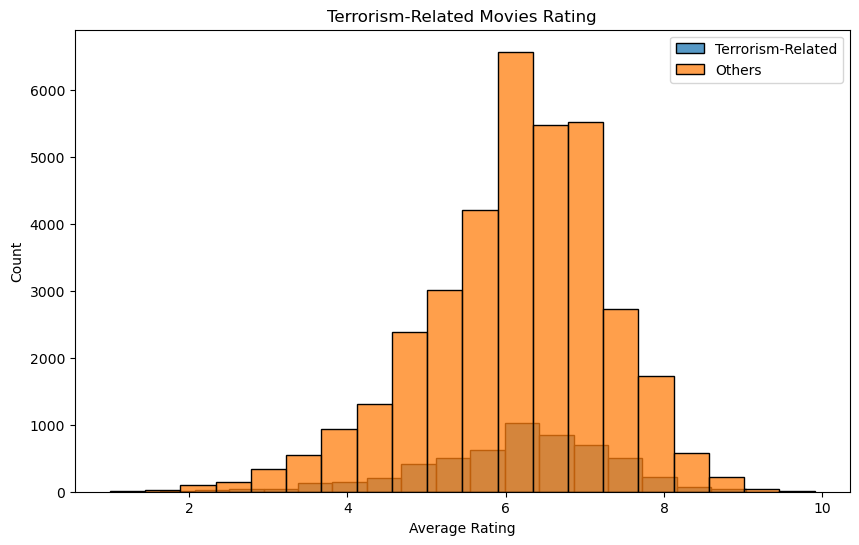

In [46]:
fig, ax = plt. subplots(figsize= (10,6))
sns.histplot(terrorism_merged['averageRating'], bins=20, label='Terrorism-Related')
sns.histplot(other_merged['averageRating'], bins=20, label= 'Others')
plt.title('Terrorism-Related Movies Rating')
plt.xlabel('Average Rating')
plt.legend()
plt.show()

In [47]:
from statsmodels.stats import diagnostic

diagnostic.kstest_normal(terrorism_merged['averageRating'].values, dist = 'norm')

(0.07207119835458575, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [48]:
diagnostic.kstest_normal(other_merged['averageRating'].values, dist = 'norm')

(0.06341441300821804, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [49]:
mean_terror_rating= terrorism_merged['averageRating'].mean()
std_terror_rating= np.std(terrorism_merged['averageRating'], ddof=1)

mean_other_rating= other_merged['averageRating'].mean()
std_other_rating= np.std(other_merged['averageRating'],ddof=1)


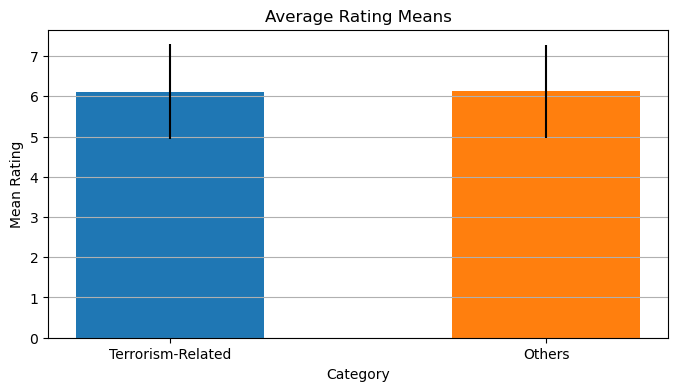

In [50]:
means= [mean_terror_rating, mean_other_rating]
stds= [std_terror_rating,std_other_rating]
cat= ['Terrorism-Related', 'Others']

fig, ax= plt.subplots(figsize= (8,4))
for i in range(2):   
    plt.bar(cat[i], means[i], yerr= stds[i], width=0.5)
    
plt.ylabel('Mean Rating')
ax.yaxis.grid(True)
plt.xlabel('Category')
plt.title('Average Rating Means')
plt.show()
plt.show()

In [51]:
other_merged['averageRating'].describe()

count    35912.000000
mean         6.123137
std          1.152253
min          1.000000
25%          5.500000
50%          6.200000
75%          6.900000
max          9.900000
Name: averageRating, dtype: float64

In [52]:
terrorism_merged['averageRating'].describe()

count    5543.000000
mean        6.117644
std         1.175137
min         1.200000
25%         5.400000
50%         6.300000
75%         6.900000
max         9.900000
Name: averageRating, dtype: float64

### 2.2 Are there noticeable **topic patterns** in terrorism movies? Do terrorism movies tend to focus on specific themes? If they do, do different countries or regions portray different themes in their cinematic representation of terrorism?

In [63]:
df_plot = m_plot.rename(columns={0: 'W_movie ID', 1: 'summary'})
df_for_topics = pd.merge(terrorism_movies, df_plot, on='W_movie ID', how='inner')
df_for_topics.drop('Box office revenue', axis =1, inplace=True)
df_for_topics.head(3)

,W_movie ID,Movie name,Release date,Countries,Languages,Genres,summary
0,32986669,Robbery Under Arms,1907,"{""/m/0chghy"": ""Australia""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",Key scenes of the film included the branding o...
1,7870349,Dr. Jekyll and Mr. Hyde,1908,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",Dr. Jekyll and Mr. Hyde began with the raising...
2,29391146,The Black Viper,1908,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}","{""/m/06ppq"": ""Silent film""}",A thug accosts a girl as she leaves her workpl...


**In this section we remove all rows containing null values for Countries as I will be an essential tool in our computation**



In [66]:
contains_empty_json = df_for_topics['Countries'].apply(is_empty_json)
filtered_df_for_topics = df_for_topics[~contains_empty_json]
filtered_df_for_topics.shape[0]

NameError: name 'is_empty_json' is not defined